In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from lib.naive_bayes import NaiveBayes

In [3]:
X, y = make_blobs(n_samples=60, centers=2, random_state=2, cluster_std=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

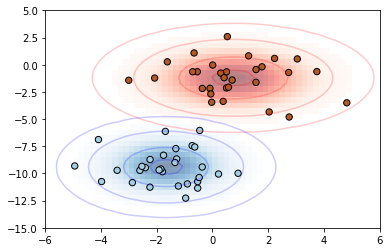

In [4]:
# adapted from https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html
fig, ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='black', s=40)

xlim = (-6, 6)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['blue', 'red']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)
plt.show()

In [5]:
# create a naive bayes model
model = NaiveBayes()
model.fit(X_train, y_train)

In [6]:
# this classifier
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [7]:
# sklearn classifier
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

accuracy_score(y_test, clf.predict(X_test))

1.0

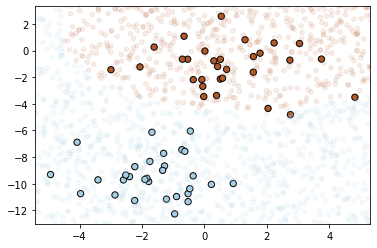

In [8]:
# plot the results    
np.random.seed(seed=0)

X_new = [-6, -14] + [14, 18] * np.random.rand(2000, 2)
y_new = model.predict(X_new)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='black', s=40)
lim = plt.axis()
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap=plt.cm.Paired, s=20, alpha=0.1)

plt.axis(lim)
plt.show()